## **César Bertoni Ocampo**

In [37]:
using PyPlot #Mando a llamar el paquete de graficación PyPlot
using Calculus

### Ejercicio 1

En clase vimos que la función `bits` permite ver la representación binaria de números de punto flotante (`Float64`) o de enteros (e.g., `Int64`). En particular, para números de punto flotante, el primer bit es el signo, los siguiente 11 son el *exponente* y el resto es la representación binaria (sin el 1 del principio), del número en cuestión.

La pregunta es ¿qué significa el exponente?

```julia
bits(1.0)
"0111111111110000000000000000000000000000000000000000000000000000"
```

In [38]:
bits(1.0)

"0011111111110000000000000000000000000000000000000000000000000000"

In [39]:
a=0
for i in 1:10
    a = 1//(2^(i))+a
end
a

1023//1024

En una máquina de 64 bits, el primer dígito es el signo, aqui es 0, luego es positivo, luego los siguiente once dígitos es el exponente en base 2 a la que hay que elevar la "fracción", que son los 52 números que falta. Para pasar de esta representación a al número que representa se emplea la siguiente fórmula.

$$
(-1)^{\text{sign}}(1+\sum_{i=1}^{52} b_{52-i}2^-i)\times2^{e-1023}
$$

En donde $b_k$ es el $k$-ésimo bit de la fracción, e el exponente (en decimal), sign el valor del primer bit (el orden es inverso, el primer bit para nosotros es el numerado con 63 en este caso), vemos que si hacemos la sustitución correspondiente, como todos los bits de la fracción son cerom ebtibces bis queda un $2^{e-1023}$ pero como ese es casualmente el valor de nuestro exponente, entonces toda la suma da 1.

In [40]:
base(10,11)

"11"

Las consultas rápidas que hice para entender lo que sucedía:


https://youtu.be/PZRI1IfStY0 (Estoy suscrito)


https://en.wikipedia.org/wiki/Double-precision_floating-point_format (Soy honesto)

### Ejercicio 2

- ¿Cuál es el número más chico que sumado (o restado) a 1.0 me da algo distinto de 1.0?
(Este número se bautiza como el "épsilon de la máquina")

- ¿Cuál es el número más chico que sumado (o restado) a 10.0 me da algo distinto de 10.0?


**La primera pregunta**
     
Lo pienso alreves, va evaluando las potencias de 10 desde -1000 hasta 0, en pasos de 0.00001, cuando la diferencia a es distinta a 1, le mando a imprimir el valor de la épsilon que es 10 a la potencia donde se detuvo y luego le digo que me imprima la potencia en donde se detuvo, es decir el número de índice dónde se quedó.
     
**La segunda pregunta**
     
Hago lo mismo que en la primera sólo varío en donde corresponda, el 10 en la seguda línea y en el agumento del if.

El npumero más chico es aquel que bautizo como c.

En estos ejercicios quizá deban perdonar mis códigos, estoy un poco oxidado en julia.

In [142]:
b=0
c=0
for i in 0:1:1000   #First question
    c=10.0^(-1000+i)
    b = 1.0-c #Veo qué le hace un número lo suficientente pequeño al ser restado de 1
    if(b != 1.0)  #Si le hizo algo, ie. identifica al resultado distinto de uno
        println(c)  #imprime el valor que hizo el cambio
        println(-1000+i+1)  #e imprime el valor de la potencia de 10 a la que se dió el cambio
        break
    end
end

1.0e-16
-15


In [143]:
1.0-c

0.9999999999999999

In [144]:
1.0-c*1e-1

1.0

In [145]:
c*1e-1

1.0e-17

In [151]:
b=0
c=0
for i in 0:1:1000   #Second question
    c=10.0^(-1000+i) #Lo mismo que el programa anterior solo que ahora se evalua para 10.
    b = 10.0-c 
    if(b != 10.0)  
        println(c)  
        println(-1000+i+1)  
        break
    end
end

1.0e-15
-14


In [152]:
10.0-c

9.999999999999998

In [153]:
10.0-c*1e-1

10.0

In [155]:
c*1e-1

1.0000000000000001e-16

### Ejercicio 3

Define una functión llamada `derivada1` que implemente el cálculo de:

$$
\frac{\Delta f(x)}{\Delta x}(x_0) = \frac{f(x_0+h)-f(x_0)}{h}
$$

Obviamente esta función es una aproximación *finita* de la derivada. La pregunta es ¿qué tan buena es esta aproximación, pensando en términos de $h$?

- La primer sub-pregunta es ¿cómo se responde este tipo de pregunta?
- Uno tiene que tomar un caso concreto (para $f(x_0,h)$); sugiero empezar con un polinomio con coeficientes enteros, y después hacer el mismo tipo de pruebas con una función trascendental.
- ¿Hay algo *sorprendente* en el comportamiento de `derivada1` como función de $h$? ¿A qué lo puedes atribuir?
- ¿Puedes hacer que la función `derivada1` funcione para funciones más o menos arbitrarias, que el usuario define?
- ¿Puedes explicar de alguna manera los resultados que has obtenido?

Reordenando la expresión de la derivada
$$
h \frac{\Delta f(x_o)}{\Delta x} (x_o)+f(x_o)=f(x_o+h)
$$
Si lo vemos como una expansión de Taylor en rededor de $x_o$, vemos que realmente
$$
O(h^2) + h \frac{\Delta f(x_o)}{\Delta x} (x_o)+f(x_o)=f(x_o+h)
$$
Donde los términos de error están contenidos con la notación O(h^2), lo que nos quiere decir que el error es del orden de $h^2$ hasta ahora con la expansión de taylor, pero si despejamos de tal manera que tengamos la derivada, es decir

$$
\frac{\Delta f(x)}{\Delta x}(x_0) = \frac{f(x_0+h)-f(x_0)}{h} + \frac{O(h^2)}{h}
$$

Tenemos que el término más significativo del error es de la forma $C h^2 /h = C h$ con $C$ una constante, con lo que ahora nuestro error es del orden de $h$, por lo que esperamos que si comparamos el comportamiento de lo que realmente es la derivada de una función con la aproximación que estamos haciendo, al graficar el error respecto vs. $h$ lo que veamos debería ser una recta.

Lo que leí. Giordano, Nicholas J. & Nakanishi, Hisao. *Computational Physics*. Second Edition. Prearson Prentice Hall. 2006. pp 2-3

Más la iluminación que en la que me hizo caer el profe.

In [43]:
function derivada1(funct, x0, h) #tiene como entradas una función, un valor de x y el tamaño del paso
    (funct(x0+h)-funct(x0))/h
end

derivada1 (generic function with 1 method)

In [44]:
f(x) = x^2       #Aquí se pueden modificar las funciones a su antojo
g(x) = 2x^5-6x^4+3.3x^3+1.1x^2+7x-12.1
h(x) = tan(x)

h (generic function with 1 method)

In [45]:
function variah1(funct,x0) #como entradas una función y un valor de x
    dat = zeros(100,2) #hago un arreglo de zeros de 2 columnas y 100 hileras
    tam = length(dat[:,1]) #mido las hileras
     
    for i in 1:tam    #hago correr el índice para reasignar los valores de la primera columna a los valores de la 
        dat[i,1]=10.0^-i   #la potencia de 10 que le meto el paso, del más grande al más chico
        dat[i,2]=abs(funct'(big(x0))-derivada1(f,big(x0),10.0^-i)) #lo hice así por que en el eje x si lo hacia directo con el tamaño del 
    end         #paso no se graficaba correctamente.
    return dat
end

variah1 (generic function with 1 method)

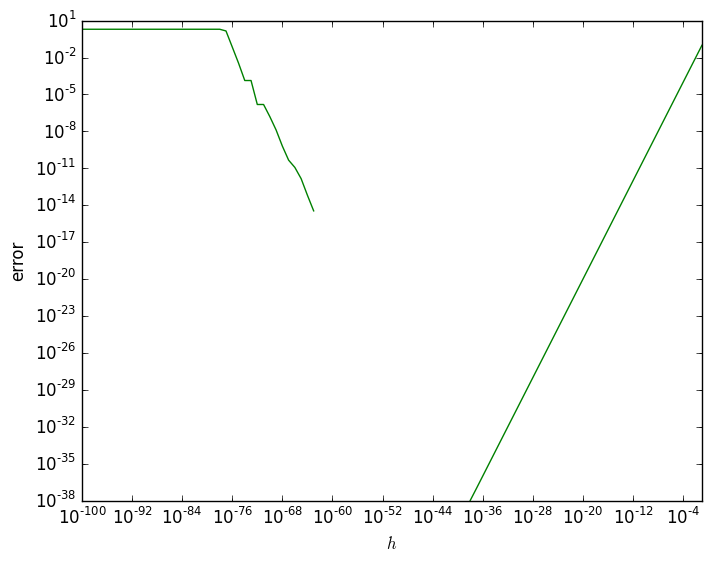

PyObject <matplotlib.text.Text object at 0x7f79c0c35f28>

In [46]:
k = variah1(f,1);  #evaluo f' en x_o=2.5
loglog(k[:,1],k[:,2],"g")  #grafico los valores.
xlabel(L"h")
ylabel("error")

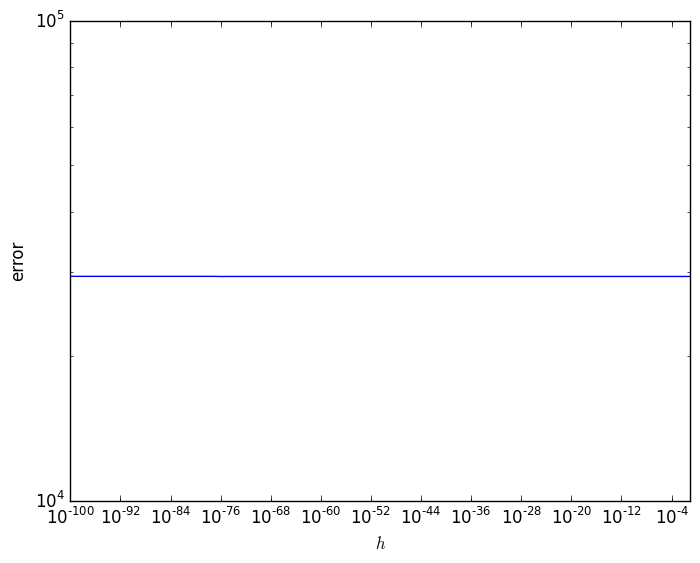

PyObject <matplotlib.text.Text object at 0x7f79bffe58d0>

In [47]:
l=variah1(g,8) #evaluo g' en x=8
loglog(l[:,1],l[:,2])
xlabel(L"h")
ylabel("error")

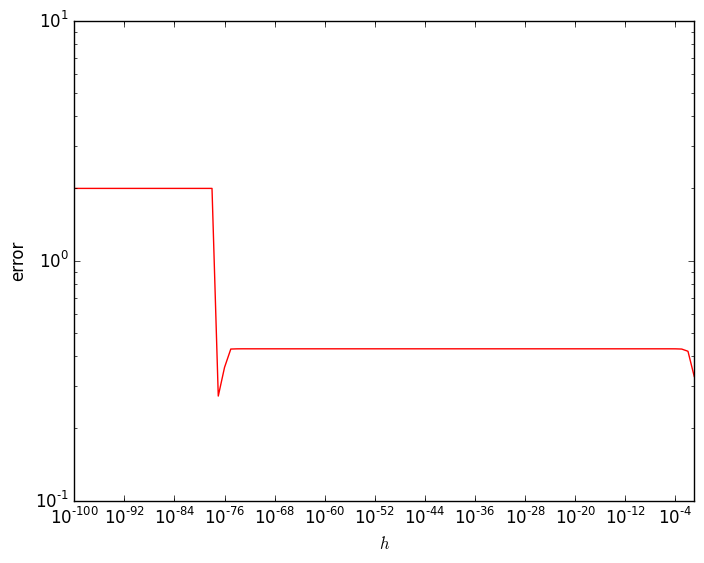

PyObject <matplotlib.text.Text object at 0x7f79c0bcfa90>

In [48]:
m = variah1(h,pi/4);  #evaluo f' en x_o=2.5
loglog(m[:,1],m[:,2],"r")  #grafico los valores.
xlabel(L"h")
ylabel("error")

Lo que he notado es que no siempre se comporta de manera lineal, pues como en la primera función `f` que definí, si hay un buen intervalo de $h$ donde el comportamiento es eminentemente linal, pero, se asoma que no se obtiene una mejor presición al hacer más chica la $h$, por otra parte, depende la presición no sólo de la función que le estemos metiendo sino del punto donde estemos calculando la derivada, pero al menos para polinomios sencillitos el error en algún momento va como $h$.

### Ejercicio 4

Este ejercicio es equivalente al anterior, pero considerando la función `derivada2` que implemente el cálculo de:

$$
\frac{\Delta f(x)}{\Delta x}(x_0) = \frac{f(x_0+h)-f(x_0-h)}{2h}
$$

¿Puedes explicar por qué la convergencia es mejor en este caso?

Este término viene del promedio de la derivada en rededor de $x_o$, por lo que se espera que el cálculo sea más refinado al usar los valores que preceden y anteceden al punto $x_o$, si no mal recuerdo también hay una ventaja que proporciona el teorema del valor medio, en done el promedio de la derivada en cierto intervalo se puede sacar al hacer la cuenta con los valores extremos de dicho intervalo.

In [49]:
function derivada2(funct, x0, h)  #hago lo mismo que en el ejercicio anterior, solo cambio las operaciones necesarias.
    (funct(x0+h)-funct(x0-h))/(2*h)
end

derivada2 (generic function with 1 method)

In [50]:
function variah2(funct,x0)#es exactamente el código de arriba, salvo que ahora uso la nueva función derivada2
    dat = zeros(100,2)
    tam = length(dat[:,1])
    
    for i in 0:tam-1
        dat[i+1,1]=10.0^-((tam-1)-i)
        dat[i+1,2]=abs(funct'(big(x0))-derivada1(f,big(x0),10.0^-((tam-1)-i)))
    end
    return dat
end

variah2 (generic function with 1 method)

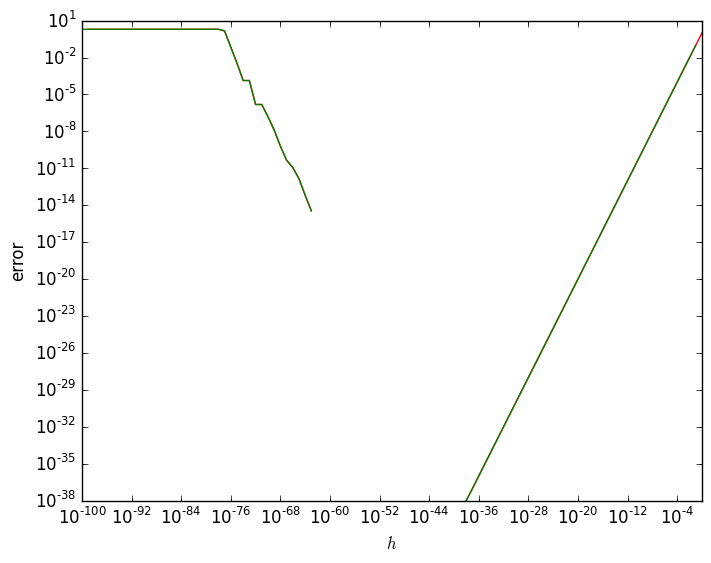

PyObject <matplotlib.text.Text object at 0x7f79bfe29f60>

In [58]:
n2 = variah2(f,1.0)
n1 = variah1(f,1.0);  #evaluo f' en x_o=2.5
loglog(n2[:,1],n2[:,2],"r",label=("derivada 2"))
loglog(n1[:,1],n1[:,2],"g",label=("derivada 1"))  #grafico los valores.#la gráfica para f
xlabel(L"h")
ylabel("error")

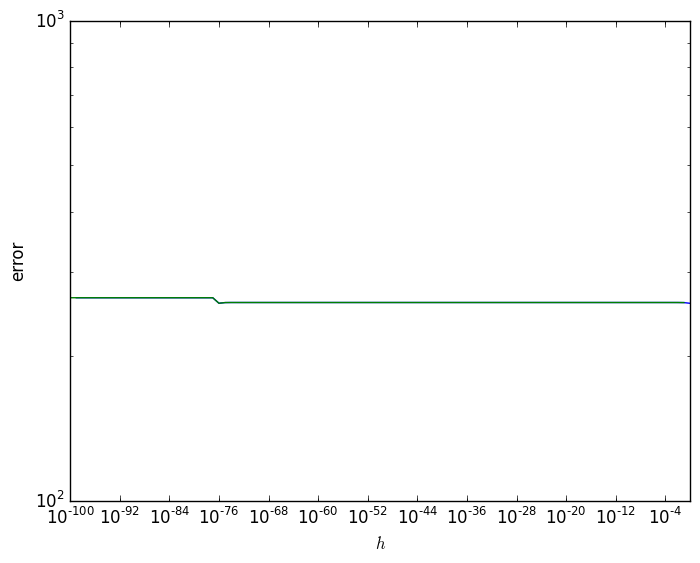

PyObject <matplotlib.text.Text object at 0x7f79bfd3deb8>

In [52]:
o2 = variah2(g,3);
o1 = variah1(g,3);
loglog(o2[:,1],o2[:,2],label=("derivada 2")) #la gráfica para g
loglog(o1[:,1],o1[:,2],label=("derivada 1"))
xlabel(L"h")
ylabel("error")

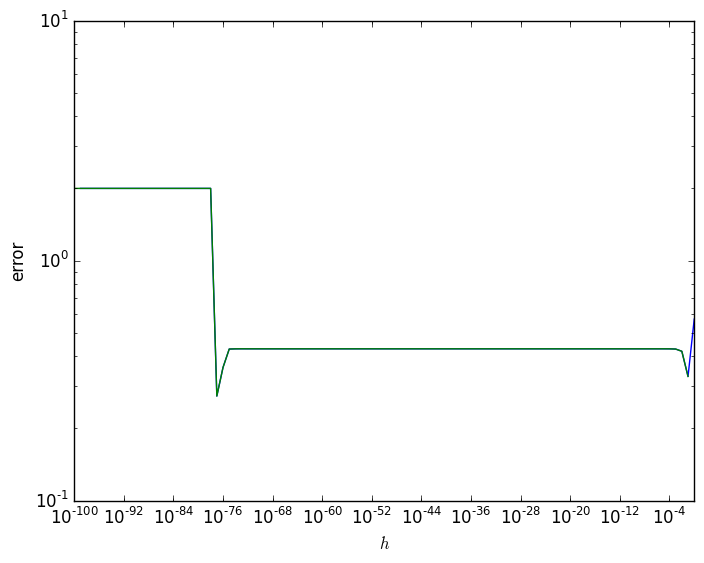

PyObject <matplotlib.text.Text object at 0x7f79bfbfc6d8>

In [53]:
p2 = variah2(h,pi/4);
p1 = variah1(h,pi/4);
loglog(p2[:,1],p2[:,2],label=("derivada 2")) #la gráfica para g
loglog(p1[:,1],p1[:,2],label=("derivada 1"))
xlabel(L"h")
ylabel("error")

Lo que observo es que los errores se comportan igual, puesto que las gráficas se superponen, tiene sentido por que la aproximación sigue sin estar a un orden superior que el primero.

Por cierto que quise poner un cuadro de texto que dijera que cosa representaba cada colo en las gráficas, pero no funcionó ahora, revisé los notebooks que hice hace aproximadamente 1 año e hice lo mismo que entonces y no salió el la acotación.

### Ejercicio 5

Manda el notebook con tus resultados haciendo un pull-request al repositorio del curso. Para hacer esto:
- Haz un `fork` del repositorio del curso a tu propia cuenta en GitHub
- Una vez que tengas resuelto el notebook, súbelo a **tu** repositorio (con `git push`), en la carpeta "tareas/usuario_github/nombre_notebook"
- Desde tu repositorio, haz un "Pull Request". El *pull request* sólo se aceptará si es legible en el sentido más amplio de la palabra y, obviamente, si es correcto. Esto significa que debe ser *entendible*, a partir de lo que ustedes escriben, incluso para gente que no está en el curso. (Como GitHub es público, piensen fríamente que esto puede ser leido por *muuucha* gente allá afuera.) Si el trabajo es en colaboración, háganlo saber en el propio notebook (cosa que se debe notar en el historial de lo que envíen). Finalmente, como código ético, incluyan cualquier fuente de inspiración, incluso cuando se trate del notebook de otro compañero/equipo del curso.